In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

In [11]:
genome = 'mm10'
infile = f'../resources/experimentList_v3_{genome}_TFs_only_QC_filtered.tab'
experiment_tf = pd.read_csv(infile,sep='\t',usecols=[0,3])
experiment_tf.columns = ['id','antigen']
experiment_tf.sort_values(by='antigen',inplace=True)
experiment_tf.reset_index(drop=True,inplace=True)
TFs = experiment_tf['antigen'].unique()

In [39]:
frac_var = np.zeros((len(TFs),3))
N = np.zeros(len(TFs))
for i,tf in enumerate(TFs):
    infile = f'../results/{genome}/svd/Window_pm5kb_bin_size_10/{tf}.hdf5'
    with h5py.File(infile,'r') as f:
        #U = f['U'][:]
        S = f['S'][:]
        #V = f['V'][:]
    f = np.square(S)/np.sum(np.square(S))
    n = f.shape[0]
    frac_var[i,:min(3,n)] = f[:min(3,n)]
    N[i] = n

        


Actb
Adnp
Aebp2
Ago2
Ahr
Aire
Arid1a
Arid1b
Arid2
Arid3a
Arid4b
Arid5a
Arnt
Arntl
Arx
Ascl1
Ascl2
Ash1l
Ash2l
Asxl1
Asxl3
Atf2
Atf3
Atf4
Atf7
Atf7ip
Atm
Atoh1
Atrx
Auts2
Bach1
Bach2
Batf
Batf3
Baz1b
Baz2a
Bbx
Bcl11a
Bcl11b
Bcl6
Bcor
Bend3
Bhlhe40
Bhlhe41
Bmi1
Bnc1
Brca1
Brd2
Brd3
Brd4
Brd7
Brd9
Brwd1
Carm1
Cbfa2t2
Cbfa2t3
Cbfb
Cbx2
Cbx3
Cbx4
Cbx5
Cbx7
Cbx8
Ccar1
Ccnk
Cdc73
Cdk7
Cdk8
Cdk9
Cdx2
Cebpa
Cebpb
Cebpd
Cebpe
Cebpg
Chd2
Chd4
Chd7
Chd8
Chuk
Clock
Creb1
Creb3l2
Crebbp
Crtc2
Crtc3
Crx
Cry1
Ctbp2
Ctcf
Ctcfl
Ctnnb1
Ctr9
Cux2
Cxxc1
Cxxc5
Daxx
Dbp
Ddit3
Ddx21
Ddx5
Dhx9
Dicer1
Dlx1
Dlx3
Dmap1
Dmrt1
Dmrtb1
Dnmt1
Dnmt3a
Dnmt3b
Dnmt3l
Dnttip1
Dot1l
Dpf2
Dpf3
Dr1
Duxbl1
Dyrk1a
E2f1
E2f3
E2f4
E2f6
E4f1
Ebf1
Ebf2
Ebf4
Eed
Egr1
Egr2
Ehf
Ehmt2
Elf1
Elf4
Elf5
Elk1
Elk3
Elk4
Ell
Ell2
Ell3
Eloa
Emx2
Eomes
Ep300
Epop
Erf
Erg
Esr1
Esr2
Esrra
Esrrb
Esrrg
Ets1
Ets2
Etv2
Etv5
Etv6
Ezh1
Ezh2
Fev
Fgfr1
Fli1
Fos
Fosb
Fosl1
Fosl2
Foxa1
Foxa2
Foxa3
Foxc1
Foxc2
Foxf1
Foxg1
Foxh1
Foxj2
Foxk1
Foxk2
Foxl2
Foxo1

Text(0, 0.5, 'Fraction of variance explained by component 2')

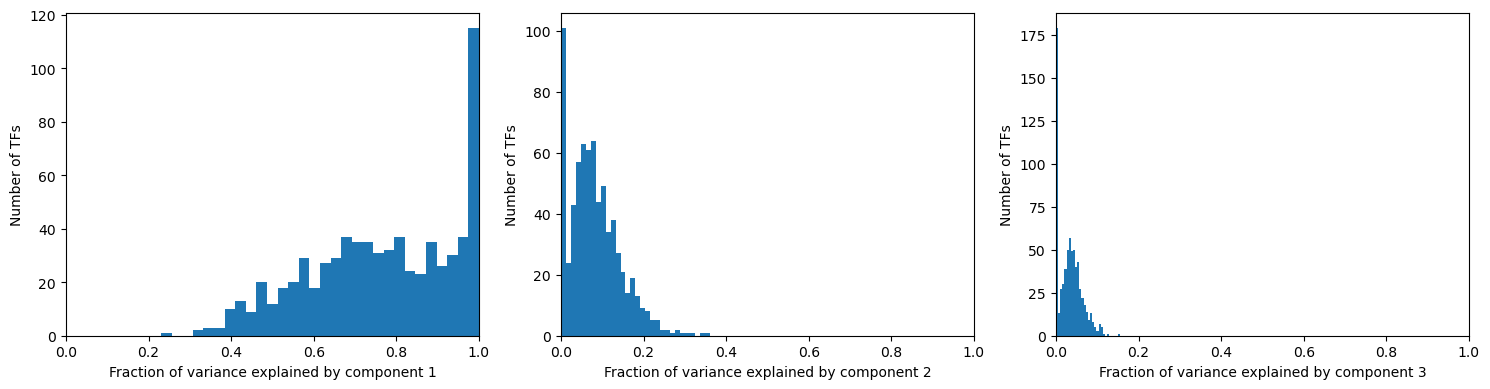

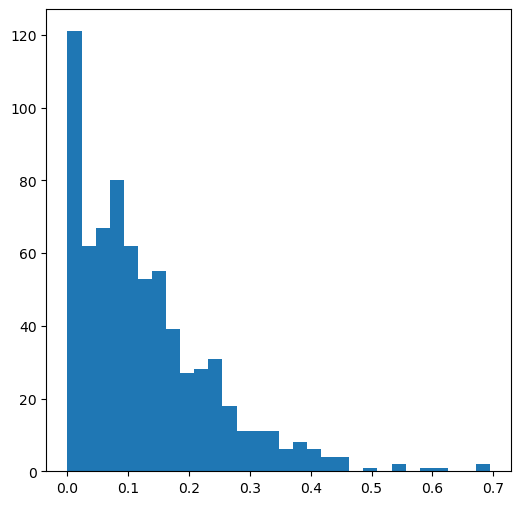

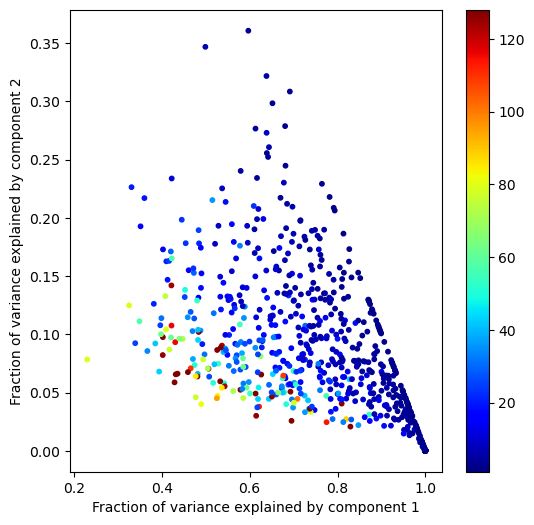

In [42]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

for i in range(3):
    ax = axes[i]
    ax.hist(frac_var[:,i],bins=30)
    ax.set_xlabel(f'Fraction of variance explained by component {i+1}')
    ax.set_ylabel('Number of TFs')
    ax.set_xlim(0,1)

plt.tight_layout()

ratio_2_1 = frac_var[:,1]/frac_var[:,0]

fig, ax = plt.subplots(figsize=(6,6))
ax.hist(frac_var[:,1]/frac_var[:,0],bins=30)


fig, ax = plt.subplots(figsize=(6,6))

h = ax.scatter(frac_var[:,0],frac_var[:,1],s=10,c=N,cmap='jet')
cbar = fig.colorbar(h)
ax.set_xlabel('Fraction of variance explained by component 1')
ax.set_ylabel('Fraction of variance explained by component 2')




In [53]:
def get_chip_table(genome):
    infile=f"../resources/experimentList_v3_{genome}_TFs_only_QC_filtered.tab"
    experiment_tf = pd.read_csv(infile,sep='\t',usecols=[0,3])
    experiment_tf.columns = ['id','antigen']
    experiment_tf.sort_values(by='antigen',inplace=True)
    experiment_tf.reset_index(drop=True,inplace=True)

    return experiment_tf

def get_tfs(genome):
    experiment_tf = get_chip_table(genome)
    return list(np.sort(experiment_tf.antigen.unique()))

def get_all_svd_files(genome,window_kb,bin_size):
    TFs = get_tfs(genome)
    svd_files = [f"results/{genome}/svd/Window_pm{window_kb}kb_bin_size_{bin_size}/{tf}.hdf5" for tf in TFs]
    return svd_files

In [59]:
genome = 'mm10'
window_kb = 5
bin_size = 10
files = get_all_svd_files(genome,window_kb,bin_size)
TFs = [os.path.basename(f).split('.')[0] for f in files]

In [60]:
TFs

['Actb',
 'Adnp',
 'Aebp2',
 'Ago2',
 'Ahr',
 'Aire',
 'Arid1a',
 'Arid1b',
 'Arid2',
 'Arid3a',
 'Arid4b',
 'Arid5a',
 'Arnt',
 'Arntl',
 'Arx',
 'Ascl1',
 'Ascl2',
 'Ash1l',
 'Ash2l',
 'Asxl1',
 'Asxl3',
 'Atf2',
 'Atf3',
 'Atf4',
 'Atf7',
 'Atf7ip',
 'Atm',
 'Atoh1',
 'Atrx',
 'Auts2',
 'Bach1',
 'Bach2',
 'Batf',
 'Batf3',
 'Baz1b',
 'Baz2a',
 'Bbx',
 'Bcl11a',
 'Bcl11b',
 'Bcl6',
 'Bcor',
 'Bend3',
 'Bhlhe40',
 'Bhlhe41',
 'Bmi1',
 'Bnc1',
 'Brca1',
 'Brd2',
 'Brd3',
 'Brd4',
 'Brd7',
 'Brd9',
 'Brwd1',
 'Carm1',
 'Cbfa2t2',
 'Cbfa2t3',
 'Cbfb',
 'Cbx2',
 'Cbx3',
 'Cbx4',
 'Cbx5',
 'Cbx7',
 'Cbx8',
 'Ccar1',
 'Ccnk',
 'Cdc73',
 'Cdk7',
 'Cdk8',
 'Cdk9',
 'Cdx2',
 'Cebpa',
 'Cebpb',
 'Cebpd',
 'Cebpe',
 'Cebpg',
 'Chd2',
 'Chd4',
 'Chd7',
 'Chd8',
 'Chuk',
 'Clock',
 'Creb1',
 'Creb3l2',
 'Crebbp',
 'Crtc2',
 'Crtc3',
 'Crx',
 'Cry1',
 'Ctbp2',
 'Ctcf',
 'Ctcfl',
 'Ctnnb1',
 'Ctr9',
 'Cux2',
 'Cxxc1',
 'Cxxc5',
 'Daxx',
 'Dbp',
 'Ddit3',
 'Ddx21',
 'Ddx5',
 'Dhx9',
 'Dicer1',
 'Dlx